<a href="https://colab.research.google.com/github/reban87/ML-Projects/blob/main/Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basics of image classification using Random Forest and KNN

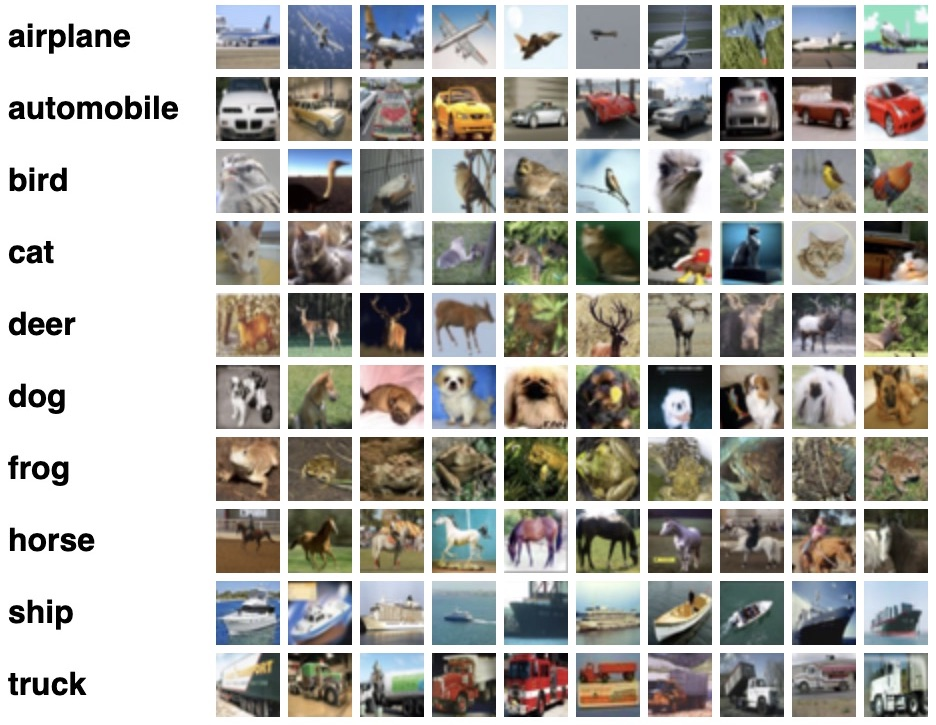

let’s import the required packages as follows:

In [ ]:
from tensorflow import keras
import matplotlib.pyplot as plt

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import numpy as np

The dataset can be loaded using the code below:

In [ ]:
import cv2

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


We can obtain the size of the train and test datasets as shown below:

In [ ]:
x_train.shape,x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [ ]:
class_names=['0','1','2','3','4','5','6','7','8','9']
class_names

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


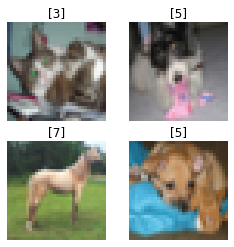

In [ ]:
import random
plt.figure(figsize=(4,4))

for i in range(4):
  plt.subplot(2,2,i+1)
  rand_index=random.choice(range(len(x_train)))
  plt.imshow(x_train[rand_index],cmap=None)
  plt.title(y_train[rand_index])
  plt.axis(False)

## Dataset Pre-Processing
This step includes the normalization of images followed by their reshaping.

Normalization is a common step of image pre-processing and is achieved by simply dividing x_train by 255.0 for the train dataset and x_test by 255.0 for the test dataset. This is essential to maintain the pixels of all the images within a uniform range.

In [ ]:
# Normalization
x_train = x_train/255.0
x_test = x_test/255.0

In [ ]:
#sklearn expects i/p to be 2d array-model.fit(x_train,y_train)=>reshape to 2d array
nsamples, nx, ny, nrgb = x_train.shape
x_train2 = x_train.reshape((nsamples,nx*ny*nrgb))

In [ ]:
#so,eventually,model.predict() should also be a 2d input
nsamples, nx, ny, nrgb = x_test.shape
x_test2 = x_test.reshape((nsamples,nx*ny*nrgb))

**Implementing a Random Forest Classifier**

Let’s build a Random Forest Classifier to classify the CIFAR-10 images.

For this, we must first import it from sklearn:

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()                          # Create an instance of the RandomForestClassifier class:
model.fit(x_train2,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier()

In [ ]:
#  Predict for the test set using the fitted Random Forest Classifier model:
y_pred=model.predict(x_test2)
y_pred

array([6, 8, 8, ..., 3, 5, 7], dtype=uint8)

Evaluate the model with the test images by obtaining its classification report, confusion matrix, and accuracy score.

In [ ]:
accuracy_score(y_pred,y_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.56      0.56      0.56      1012
           1       0.56      0.53      0.55      1049
           2       0.33      0.37      0.35       882
           3       0.27      0.33      0.30       834
           4       0.41      0.41      0.41      1010
           5       0.39      0.42      0.40       927
           6       0.57      0.48      0.52      1186
           7       0.45      0.51      0.48       883
           8       0.61      0.58      0.60      1054
           9       0.55      0.47      0.51      1163

    accuracy                           0.47     10000
   macro avg       0.47      0.47      0.47     10000
weighted avg       0.48      0.47      0.48     10000



In [ ]:
confusion_matrix(y_pred,y_test)

array([[563,  28,  98,  54,  53,  34,  11,  35,  88,  48],
       [ 34, 560,  52,  42,  25,  27,  29,  35,  82, 163],
       [ 49,  15, 330,  86, 146,  92,  82,  47,  19,  16],
       [ 21,  38,  82, 274,  50, 165,  74,  69,  29,  32],
       [ 30,  19, 153,  75, 415,  72, 111,  93,  22,  20],
       [ 21,  34,  60, 179,  45, 388,  55,  95,  31,  19],
       [ 29,  38, 117, 136, 133,  79, 568,  48,  13,  25],
       [ 29,  26,  55,  61,  86,  80,  26, 454,  22,  44],
       [164,  60,  24,  25,  27,  25,   7,  24, 614,  84],
       [ 60, 182,  29,  68,  20,  38,  37, 100,  80, 549]])

Thus, Random Forest Classifier shows only 47% accuracy on the test set.

## Implementing a KNN
KNN stands for K-Nearest neighbours. It is also an algorithm popularly used for multi-class classification.

It is implemented in sklearn using KNeighborsClassifier class. We begin by importing it:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)                   # instantiating it to create a KNN model:

In [ ]:
knn.fit(x_train2,y_train) 

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=7)

In [ ]:
y_pred_knn=knn.predict(x_test2)
y_pred_knn

array([2, 8, 8, ..., 5, 6, 4], dtype=uint8)

In [ ]:
accuracy_score(y_pred_knn,y_test)
print(classification_report(y_pred_knn,y_test))

              precision    recall  f1-score   support

           0       0.52      0.40      0.45      1299
           1       0.20      0.70      0.30       280
           2       0.44      0.22      0.29      2013
           3       0.20      0.28      0.23       707
           4       0.52      0.23      0.32      2222
           5       0.20      0.40      0.27       504
           6       0.27      0.35      0.30       761
           7       0.20      0.70      0.31       281
           8       0.69      0.39      0.50      1749
           9       0.14      0.73      0.23       184

    accuracy                           0.34     10000
   macro avg       0.34      0.44      0.32     10000
weighted avg       0.45      0.34      0.35     10000



In [ ]:
confusion_matrix(y_pred_knn,y_test)

array([[518, 118, 110,  66,  60,  63,  22,  78, 112, 152],
       [  7, 195,   2,   5,   0,   2,   1,   8,  10,  50],
       [118, 124, 437, 243, 268, 225, 271, 185,  47,  95],
       [ 12,  51,  50, 199,  33, 156,  56,  57,  34,  59],
       [ 46, 173, 250, 214, 521, 201, 319, 294,  69, 135],
       [  5,  32,  24, 102,  14, 204,  32,  60,  12,  19],
       [ 30,  55,  65, 108,  44,  80, 265,  48,  14,  52],
       [  5,   8,   7,  11,  11,  10,   1, 196,   7,  25],
       [255, 223,  53,  51,  48,  53,  32,  68, 688, 278],
       [  4,  21,   2,   1,   1,   6,   1,   6,   7, 135]])